In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob , os
import dask.dataframe as dd
%matplotlib inline

df = pd.read_csv("/home/vikram/Downloads/training/p000001.psv",delimiter="|")
df.head()

# Code to import the entire Training set as a single concatenated CSV file.

#path = r'/home/vikram/Downloads/training' 
#all_files = glob.glob(path + "/*.psv")
#li = []

#for filename in all_files:
#    frame = pd.read_csv(filename,delimiter='|',index_col=None, header=0)
#    li.append(frame)

#df = pd.concat(li, axis=0, ignore_index=True)
#df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [2]:
df.shape

(54, 41)

In [3]:
count_row = df.shape[0]
count_col = df.shape[1]

rng = pd.date_range('01:00', periods=count_row, freq='1H')

df['Dates']=rng
df['Dates'] = pd.to_datetime(df['Dates'])
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Dates
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,2020-01-20 01:00:00
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,2020-01-20 02:00:00
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,2020-01-20 03:00:00
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,2020-01-20 04:00:00
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,2020-01-20 05:00:00
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,2020-01-20 06:00:00
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,2020-01-20 07:00:00
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,2020-01-20 08:00:00
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,2020-01-20 09:00:00
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,2020-01-20 10:00:00


In [4]:
df['datehour'] = df['Dates'].dt.hour
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,1,0,2020-01-20 01:00:00,1
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,2,0,2020-01-20 02:00:00,2
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,3,0,2020-01-20 03:00:00,3
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,4,0,2020-01-20 04:00:00,4
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,5,0,2020-01-20 05:00:00,5
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,6,0,2020-01-20 06:00:00,6
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,7,0,2020-01-20 07:00:00,7
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,8,0,2020-01-20 08:00:00,8
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,9,0,2020-01-20 09:00:00,9
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,10,0,2020-01-20 10:00:00,10


In [5]:
df['Hours'] = df.index + 1
df.set_index('Hours',inplace=True)
df1 = df
df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,1,0,2020-01-20 01:00:00,1
2,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,2,0,2020-01-20 02:00:00,2
3,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,3,0,2020-01-20 03:00:00,3
4,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,4,0,2020-01-20 04:00:00,4
5,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,5,0,2020-01-20 05:00:00,5
6,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,6,0,2020-01-20 06:00:00,6
7,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,7,0,2020-01-20 07:00:00,7
8,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,8,0,2020-01-20 08:00:00,8
9,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0,NaN,NaN,-0.03,9,0,2020-01-20 09:00:00,9


In [6]:
df = df.dropna(how="all",thresh=1,axis=1)
df

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1
2,97.0,95.0,NaN,98.0,75.33,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2
3,89.0,99.0,NaN,122.0,86.00,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3
4,90.0,95.0,NaN,NaN,NaN,30.0,24.0,NaN,NaN,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4
5,103.0,88.5,NaN,122.0,91.33,24.5,NaN,NaN,0.28,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5
6,110.0,91.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6
7,108.0,92.0,36.11,123.0,77.00,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7
8,106.0,90.5,NaN,93.0,76.33,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8
9,104.0,95.0,NaN,133.0,88.33,26.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9


In [7]:
df.fillna(method='ffill',inplace=True)
df

/home/vikram/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1
2,97.0,95.0,NaN,98.0,75.33,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2
3,89.0,99.0,NaN,122.0,86.00,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3
4,90.0,95.0,NaN,122.0,86.00,30.0,24.0,NaN,NaN,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4
5,103.0,88.5,NaN,122.0,91.33,24.5,24.0,NaN,0.28,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5
6,110.0,91.0,NaN,122.0,91.33,22.0,24.0,NaN,0.28,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6
7,108.0,92.0,36.11,123.0,77.00,29.0,24.0,NaN,0.28,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7
8,106.0,90.5,36.11,93.0,76.33,29.0,24.0,NaN,0.28,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8
9,104.0,95.0,36.11,133.0,88.33,26.0,24.0,NaN,0.28,7.36,...,NaN,NaN,NaN,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9


In [8]:
df.fillna(method='bfill',inplace=True)
df

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1
2,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2
3,89.0,99.0,36.11,122.0,86.00,22.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3
4,90.0,95.0,36.11,122.0,86.00,30.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4
5,103.0,88.5,36.11,122.0,91.33,24.5,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5
6,110.0,91.0,36.11,122.0,91.33,22.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6
7,108.0,92.0,36.11,123.0,77.00,29.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7
8,106.0,90.5,36.11,93.0,76.33,29.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8
9,104.0,95.0,36.11,133.0,88.33,26.0,24.0,45.0,0.28,7.36,...,12.5,5.7,317.0,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9


In [9]:
df.describe()

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.0,5.400000e+01,54.000000,54.0,54.000000
mean,102.055556,91.398148,36.636296,127.444444,88.253148,24.574074,20.962963,45.833333,0.278148,7.348889,...,36.922222,12.416667,8.200000,322.833333,8.314000e+01,0.0,-3.000000e-02,27.500000,0.0,10.611111
std,9.502069,3.284296,0.432981,20.850923,19.685461,4.175860,1.883022,1.356327,0.011339,0.025154,...,0.452109,0.135633,4.068981,9.494288,2.868859e-14,0.0,3.502025e-18,15.732133,0.0,7.082843
min,76.000000,85.000000,36.110000,78.000000,44.000000,17.000000,18.000000,45.000000,0.250000,7.310000,...,36.200000,12.200000,5.700000,317.000000,8.314000e+01,0.0,-3.000000e-02,1.000000,0.0,0.000000
25%,98.250000,89.000000,36.330000,120.125000,77.000000,21.625000,20.000000,45.000000,0.280000,7.330000,...,36.200000,12.200000,5.700000,317.000000,8.314000e+01,0.0,-3.000000e-02,14.250000,0.0,4.250000
50%,104.000000,91.000000,36.530000,128.000000,87.915000,25.000000,20.000000,45.000000,0.280000,7.340000,...,37.200000,12.500000,5.700000,317.000000,8.314000e+01,0.0,-3.000000e-02,27.500000,0.0,10.000000
75%,108.000000,93.000000,37.110000,138.000000,96.670000,28.000000,23.000000,48.000000,0.280000,7.360000,...,37.200000,12.500000,14.700000,338.000000,8.314000e+01,0.0,-3.000000e-02,40.750000,0.0,16.750000
max,117.000000,100.000000,37.440000,181.000000,141.330000,32.000000,24.000000,48.000000,0.300000,7.400000,...,37.200000,12.500000,14.700000,338.000000,8.314000e+01,0.0,-3.000000e-02,54.000000,0.0,23.000000


In [10]:
df.pivot_table(index="HR",columns = "Age")

,AST,Alkalinephos,BUN,BaseExcess,Bilirubin_total,Calcium,Chloride,Creatinine,FiO2,Gender,...,Platelets,Potassium,Resp,SBP,SaO2,SepsisLabel,Temp,WBC,datehour,pH
Age,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14,...,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14,83.14
HR,,,,,,,,,,,,,,,,,,,,,
76.0,16.0,98.0,22.000000,19.000000,0.3,9.60,85.0,0.7,0.250,0,...,338.0,4.600000,17.000000,85.000000,89.000000,0,36.330000,14.7,2.000000,7.320000
81.0,16.0,98.0,22.000000,19.000000,0.3,9.60,85.0,0.7,0.250,0,...,338.0,4.600000,17.000000,99.000000,89.000000,0,36.330000,14.7,3.000000,7.320000
84.0,16.0,98.0,22.000000,19.000000,0.3,9.60,85.0,0.7,0.275,0,...,338.0,4.600000,19.750000,94.750000,89.000000,0,36.330000,14.7,14.000000,7.320000
85.0,16.0,98.0,22.000000,19.000000,0.3,9.60,85.0,0.7,0.250,0,...,338.0,4.600000,26.000000,103.000000,89.000000,0,36.330000,14.7,4.000000,7.320000
86.0,16.0,98.0,22.000000,19.000000,0.3,9.60,85.0,0.7,0.275,0,...,338.0,4.600000,20.000000,107.000000,89.000000,0,36.330000,14.7,14.000000,7.320000
89.0,16.0,98.0,14.000000,24.000000,0.3,9.30,85.0,0.7,0.280,0,...,317.0,3.800000,22.000000,122.000000,88.000000,0,36.110000,5.7,3.000000,7.360000
90.0,16.0,98.0,14.000000,24.000000,0.3,9.30,85.0,0.7,0.280,0,...,317.0,3.800000,30.000000,122.000000,88.000000,0,36.110000,5.7,4.000000,7.360000
96.0,16.0,98.0,22.000000,18.000000,0.3,9.60,85.0,0.7,0.300,0,...,338.0,4.600000,22.000000,119.500000,89.000000,0,36.330000,14.7,21.000000,7.310000


In [11]:
df.corr()

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
HR,1.000000e+00,-3.500262e-01,3.025913e-01,5.639293e-01,6.781939e-01,3.007736e-01,1.524938e-01,-3.550204e-01,3.774645e-01,2.714273e-01,...,3.550204e-01,3.550204e-01,-3.550204e-01,-3.550204e-01,-1.397775e-16,NaN,-2.795550e-16,-0.264109,NaN,2.585281e-01
O2Sat,-3.500262e-01,1.000000e+00,-3.376148e-01,-2.207774e-01,-2.851535e-01,-2.463846e-01,1.381940e-01,2.481370e-01,1.518958e-01,-5.164203e-02,...,-2.481370e-01,-2.481370e-01,2.481370e-01,2.481370e-01,-1.294086e-15,NaN,-1.294086e-15,-0.048294,NaN,-1.714575e-02
Temp,3.025913e-01,-3.376148e-01,1.000000e+00,1.909328e-01,2.983218e-01,9.662986e-02,-1.765129e-01,-3.560910e-01,1.177084e-01,2.984584e-01,...,3.560910e-01,3.560910e-01,-3.560910e-01,-3.560910e-01,5.460171e-14,NaN,5.460171e-14,0.076893,NaN,3.390131e-01
SBP,5.639293e-01,-2.207774e-01,1.909328e-01,1.000000e+00,7.554009e-01,3.071078e-01,-1.091395e-01,-2.315069e-01,3.020034e-01,9.809129e-02,...,2.315069e-01,2.315069e-01,-2.315069e-01,-2.315069e-01,0.000000e+00,NaN,1.747162e-16,-0.094302,NaN,6.769093e-02
MAP,6.781939e-01,-2.851535e-01,2.983218e-01,7.554009e-01,1.000000e+00,2.926249e-01,-1.249799e-02,-3.253290e-01,4.278626e-01,8.543023e-02,...,3.253290e-01,3.253290e-01,-3.253290e-01,-3.253290e-01,-4.453011e-16,NaN,-3.392770e-16,-0.157993,NaN,7.267457e-02
Resp,3.007736e-01,-2.463846e-01,9.662986e-02,3.071078e-01,2.926249e-01,1.000000e+00,7.953936e-02,-3.259123e-01,8.662903e-02,8.342795e-02,...,3.259123e-01,3.259123e-01,-3.259123e-01,-3.259123e-01,3.498663e-16,NaN,4.361970e-16,-0.178067,NaN,-2.835229e-04
BaseExcess,1.524938e-01,1.381940e-01,-1.765129e-01,-1.091395e-01,-1.249799e-02,7.953936e-02,1.000000e+00,-6.082471e-01,1.557840e-01,7.679364e-01,...,6.082471e-01,6.082471e-01,-6.082471e-01,-6.082471e-01,5.642739e-16,NaN,4.030528e-17,-0.926711,NaN,-1.369105e-01
HCO3,-3.550204e-01,2.481370e-01,-3.560910e-01,-2.315069e-01,-3.253290e-01,-3.259123e-01,-6.082471e-01,1.000000e+00,-2.658048e-01,-6.857740e-01,...,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,-1.762640e-15,NaN,-1.245039e-15,0.775924,NaN,1.050766e-01
FiO2,3.774645e-01,1.518958e-01,1.177084e-01,3.020034e-01,4.278626e-01,8.662903e-02,1.557840e-01,-2.658048e-01,1.000000e+00,1.778719e-01,...,2.658048e-01,2.658048e-01,-2.658048e-01,-2.658048e-01,7.137579e-15,NaN,7.046072e-15,-0.296146,NaN,4.113781e-01
pH,2.714273e-01,-5.164203e-02,2.984584e-01,9.809129e-02,8.543023e-02,8.342795e-02,7.679364e-01,-6.857740e-01,1.778719e-01,1.000000e+00,...,6.857740e-01,6.857740e-01,-6.857740e-01,-6.857740e-01,9.702470e-14,NaN,9.702470e-14,-0.799117,NaN,1.765082e-01


In [12]:
df2 = df
df2 = df2.set_index('Dates')
df2

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-20 01:00:00,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,1,0,1
2020-01-20 02:00:00,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,2,0,2
2020-01-20 03:00:00,89.0,99.0,36.11,122.0,86.00,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,3,0,3
2020-01-20 04:00:00,90.0,95.0,36.11,122.0,86.00,30.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,4,0,4
2020-01-20 05:00:00,103.0,88.5,36.11,122.0,91.33,24.5,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,5,0,5
2020-01-20 06:00:00,110.0,91.0,36.11,122.0,91.33,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,6,0,6
2020-01-20 07:00:00,108.0,92.0,36.11,123.0,77.00,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,7,0,7
2020-01-20 08:00:00,106.0,90.5,36.11,93.0,76.33,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,8,0,8
2020-01-20 09:00:00,104.0,95.0,36.11,133.0,88.33,26.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,9,0,9


In [13]:
df3 = df
df3.drop('Dates' , axis=1 , inplace = True)
df3

/home/vikram/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,1,0,1
2,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,2,0,2
3,89.0,99.0,36.11,122.0,86.00,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,3,0,3
4,90.0,95.0,36.11,122.0,86.00,30.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,4,0,4
5,103.0,88.5,36.11,122.0,91.33,24.5,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,5,0,5
6,110.0,91.0,36.11,122.0,91.33,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,6,0,6
7,108.0,92.0,36.11,123.0,77.00,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,7,0,7
8,106.0,90.5,36.11,93.0,76.33,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,8,0,8
9,104.0,95.0,36.11,133.0,88.33,26.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,9,0,9


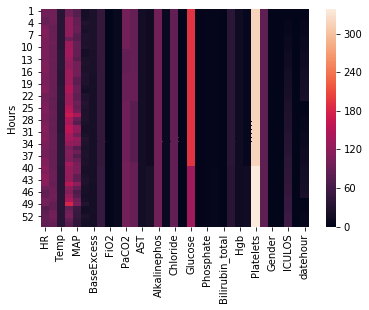

In [14]:
sns.heatmap(df3)

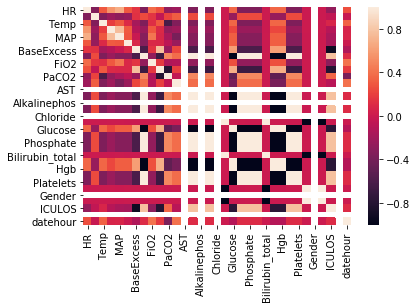

In [15]:
sns.heatmap(df3.corr())

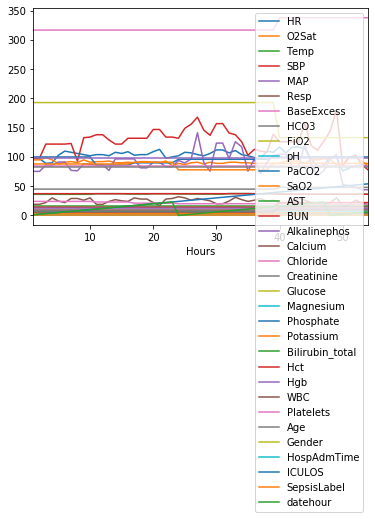

In [16]:
df3.plot()

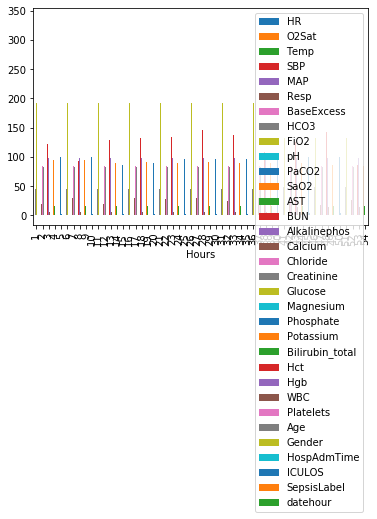

In [17]:
df3.plot(kind='bar')

In [18]:
df3.corr("spearman")

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
HR,1.000000,-0.282225,0.291890,0.497226,0.620897,0.152962,0.182781,-0.249876,0.165083,0.213106,...,0.249876,0.249876,-0.249876,-0.249876,NaN,NaN,NaN,-0.158172,NaN,0.275216
O2Sat,-0.282225,1.000000,-0.329463,-0.231478,-0.369494,-0.231689,0.125747,0.229526,0.255562,0.002500,...,-0.229526,-0.229526,0.229526,0.229526,NaN,NaN,NaN,-0.106688,NaN,0.061581
Temp,0.291890,-0.329463,1.000000,0.298439,0.358676,0.081312,-0.115239,-0.318466,0.064749,0.267102,...,0.318466,0.318466,-0.318466,-0.318466,NaN,NaN,NaN,0.113493,NaN,0.343110
SBP,0.497226,-0.231478,0.298439,1.000000,0.645087,0.242369,-0.050326,-0.244457,0.217402,0.128047,...,0.244457,0.244457,-0.244457,-0.244457,NaN,NaN,NaN,-0.060020,NaN,0.053839
MAP,0.620897,-0.369494,0.358676,0.645087,1.000000,0.224317,-0.007673,-0.220324,0.218822,0.058617,...,0.220324,0.220324,-0.220324,-0.220324,NaN,NaN,NaN,-0.051759,NaN,0.040635
Resp,0.152962,-0.231689,0.081312,0.242369,0.224317,1.000000,0.160951,-0.320664,-0.005823,0.157104,...,0.320664,0.320664,-0.320664,-0.320664,NaN,NaN,NaN,-0.180404,NaN,-0.016972
BaseExcess,0.182781,0.125747,-0.115239,-0.050326,-0.007673,0.160951,1.000000,-0.714678,0.113661,0.864974,...,0.714678,0.714678,-0.714678,-0.714678,NaN,NaN,NaN,-0.959115,NaN,-0.007101
HCO3,-0.249876,0.229526,-0.318466,-0.244457,-0.220324,-0.320664,-0.714678,1.000000,-0.152971,-0.785071,...,-1.000000,-1.000000,1.000000,1.000000,NaN,NaN,NaN,0.775924,NaN,0.079646
FiO2,0.165083,0.255562,0.064749,0.217402,0.218822,-0.005823,0.113661,-0.152971,1.000000,0.111963,...,0.152971,0.152971,-0.152971,-0.152971,NaN,NaN,NaN,-0.200190,NaN,0.395285
pH,0.213106,0.002500,0.267102,0.128047,0.058617,0.157104,0.864974,-0.785071,0.111963,1.000000,...,0.785071,0.785071,-0.785071,-0.785071,NaN,NaN,NaN,-0.857796,NaN,0.180635


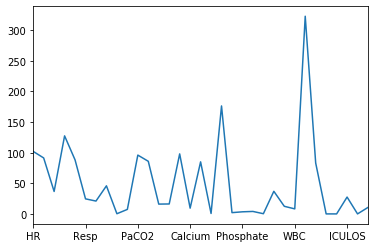

In [19]:
df3.mean().plot()

In [20]:
df.to_csv("p1.csv")

In [21]:
df1.interpolate(inplace=True)
df1.fillna(method = "bfill",inplace=True)
df1 = df1.dropna(how="all",thresh=1,axis=1)
df1

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,12.500000,5.700000,317.000000,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1
2,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,12.500000,5.700000,317.000000,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2
3,89.00,99.000000,36.1100,122.00,86.000,22.00,24.000000,45.000000,0.280000,7.360000,...,12.500000,5.700000,317.000000,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3
4,90.00,95.000000,36.1100,122.00,88.665,30.00,24.000000,45.000000,0.280000,7.360000,...,12.500000,5.700000,317.000000,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4
5,103.00,88.500000,36.1100,122.00,91.330,24.50,23.857143,45.000000,0.280000,7.365714,...,12.500000,5.700000,317.000000,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5
6,110.00,91.000000,36.1100,122.50,84.165,22.00,23.714286,45.000000,0.280500,7.371429,...,12.500000,5.700000,317.000000,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6
7,108.00,92.000000,36.1100,123.00,77.000,29.00,23.571429,45.000000,0.281000,7.377143,...,12.500000,5.700000,317.000000,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7
8,106.00,90.500000,36.3750,93.00,76.330,29.00,23.428571,45.000000,0.281500,7.382857,...,12.500000,5.700000,317.000000,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8
9,104.00,95.000000,36.6400,133.00,88.330,26.00,23.285714,45.000000,0.282000,7.388571,...,12.500000,5.700000,317.000000,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9


In [22]:
df1['MAP after 1 Hour'] = df1['MAP'].shift(-1)
df1['MAP 1 Hour change'] = abs(df1['MAP'] - df1['MAP after 1 Hour'])
df1

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour,MAP after 1 Hour,MAP 1 Hour change
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1,75.330,0.000
2,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2,86.000,10.670
3,89.00,99.000000,36.1100,122.00,86.000,22.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3,88.665,2.665
4,90.00,95.000000,36.1100,122.00,88.665,30.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4,91.330,2.665
5,103.00,88.500000,36.1100,122.00,91.330,24.50,23.857143,45.000000,0.280000,7.365714,...,317.000000,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5,84.165,7.165
6,110.00,91.000000,36.1100,122.50,84.165,22.00,23.714286,45.000000,0.280500,7.371429,...,317.000000,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6,77.000,7.165
7,108.00,92.000000,36.1100,123.00,77.000,29.00,23.571429,45.000000,0.281000,7.377143,...,317.000000,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7,76.330,0.670
8,106.00,90.500000,36.3750,93.00,76.330,29.00,23.428571,45.000000,0.281500,7.382857,...,317.000000,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8,88.330,12.000
9,104.00,95.000000,36.6400,133.00,88.330,26.00,23.285714,45.000000,0.282000,7.388571,...,317.000000,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9,87.330,1.000


In [23]:
df.to_csv("p1.csv")
df

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,1,0,1
2,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,2,0,2
3,89.0,99.0,36.11,122.0,86.00,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,3,0,3
4,90.0,95.0,36.11,122.0,86.00,30.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,4,0,4
5,103.0,88.5,36.11,122.0,91.33,24.5,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,5,0,5
6,110.0,91.0,36.11,122.0,91.33,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,6,0,6
7,108.0,92.0,36.11,123.0,77.00,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,7,0,7
8,106.0,90.5,36.11,93.0,76.33,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,8,0,8
9,104.0,95.0,36.11,133.0,88.33,26.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,9,0,9


In [24]:
df1.to_csv("p2.csv")
df1

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Dates,datehour,MAP after 1 Hour,MAP 1 Hour change
Hours,,,,,,,,,,,,,,,,,,,,,
1,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,1,0,2020-01-20 01:00:00,1,75.330,0.000
2,97.00,95.000000,36.1100,98.00,75.330,19.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,2,0,2020-01-20 02:00:00,2,86.000,10.670
3,89.00,99.000000,36.1100,122.00,86.000,22.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,3,0,2020-01-20 03:00:00,3,88.665,2.665
4,90.00,95.000000,36.1100,122.00,88.665,30.00,24.000000,45.000000,0.280000,7.360000,...,317.000000,83.14,0,-0.03,4,0,2020-01-20 04:00:00,4,91.330,2.665
5,103.00,88.500000,36.1100,122.00,91.330,24.50,23.857143,45.000000,0.280000,7.365714,...,317.000000,83.14,0,-0.03,5,0,2020-01-20 05:00:00,5,84.165,7.165
6,110.00,91.000000,36.1100,122.50,84.165,22.00,23.714286,45.000000,0.280500,7.371429,...,317.000000,83.14,0,-0.03,6,0,2020-01-20 06:00:00,6,77.000,7.165
7,108.00,92.000000,36.1100,123.00,77.000,29.00,23.571429,45.000000,0.281000,7.377143,...,317.000000,83.14,0,-0.03,7,0,2020-01-20 07:00:00,7,76.330,0.670
8,106.00,90.500000,36.3750,93.00,76.330,29.00,23.428571,45.000000,0.281500,7.382857,...,317.000000,83.14,0,-0.03,8,0,2020-01-20 08:00:00,8,88.330,12.000
9,104.00,95.000000,36.6400,133.00,88.330,26.00,23.285714,45.000000,0.282000,7.388571,...,317.000000,83.14,0,-0.03,9,0,2020-01-20 09:00:00,9,87.330,1.000


In [25]:
df2.to_csv("p3.csv")
df2

,HR,O2Sat,Temp,SBP,MAP,Resp,BaseExcess,HCO3,FiO2,pH,...,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,datehour
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-20 01:00:00,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,1,0,1
2020-01-20 02:00:00,97.0,95.0,36.11,98.0,75.33,19.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,2,0,2
2020-01-20 03:00:00,89.0,99.0,36.11,122.0,86.00,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,3,0,3
2020-01-20 04:00:00,90.0,95.0,36.11,122.0,86.00,30.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,4,0,4
2020-01-20 05:00:00,103.0,88.5,36.11,122.0,91.33,24.5,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,5,0,5
2020-01-20 06:00:00,110.0,91.0,36.11,122.0,91.33,22.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,6,0,6
2020-01-20 07:00:00,108.0,92.0,36.11,123.0,77.00,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,7,0,7
2020-01-20 08:00:00,106.0,90.5,36.11,93.0,76.33,29.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,8,0,8
2020-01-20 09:00:00,104.0,95.0,36.11,133.0,88.33,26.0,24.0,45.0,0.28,7.36,...,37.2,12.5,5.7,317.0,83.14,0,-0.03,9,0,9
